## Train a model with quadratic data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df = pd.read_csv('quadratic_all.csv')

In [3]:
df.head()

,x,y,y_noisy
0,-11.120273,921.068658,921.016598
1,14.829292,805.465821,805.082846
2,-11.731234,1004.927608,999.503858
3,16.744436,1063.758703,1066.740610
4,-0.463552,58.736111,54.262724


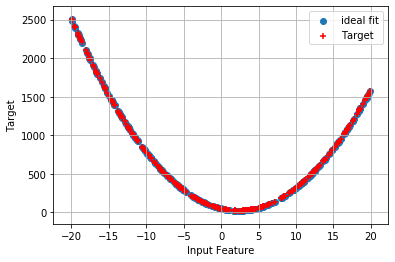

In [4]:
plt.scatter(x=df.x,y=df.y,label='ideal fit')
plt.scatter(x=df.x,y=df.y_noisy, color='r',marker='+',label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [5]:
train_file = 'quadratic_train.csv'
validation_file = 'quadratic_validation.csv'

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y_noisy','x'])
df_validation = pd.read_csv(validation_file,names=['y_noisy','x'])

In [7]:
df_train.head()

,y_noisy,x
0,330.577283,-5.558063
1,46.574088,-0.119586
2,295.927707,-5.102702
3,346.620938,10.421262
4,440.728826,-6.897442


In [8]:
df_validation.head()

,y_noisy,x
0,538.848844,12.477768
1,1006.975370,-11.739893
2,313.809512,9.967386
3,452.720007,11.560405
4,830.099204,-10.414382


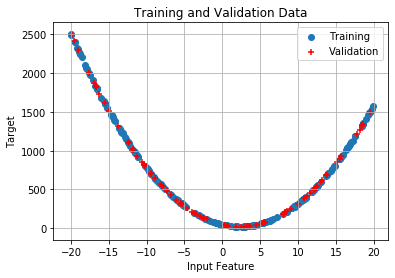

In [9]:
plt.scatter(x=df_train.x,y=df_train.y_noisy,label='Training')
plt.scatter(x=df_validation.x,y=df_validation.y_noisy, color='r',marker='+',label='Validation')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Training and Validation Data')
plt.legend()

In [11]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [12]:
# max_depth = 5,objective="reg:linear",num_round = 50
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor()

In [13]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[08:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:899.299	validation_1-rmse:845.125
[1]	validation_0-rmse:817.044	validation_1-rmse:767.829
[2]	validation_0-rmse:742.493	validation_1-rmse:695.237
[3]	validation_0-rmse:675.123	validation_1-rmse:631.871
[4]	validation_0-rmse:614.837	validation_1-rmse:576.151
[5]	validation_0-rmse:559.199	validation_1-rmse:524.75
[6]	validation_0-rmse:508.077	validation_1-rmse:475.943
[7]	validation_0-rmse:462.79	validation_1-rmse:434.542
[8]	validation_0-rmse:420.62	validation_1-rmse:393.627
[9]	validation_0-rmse:384.311	validation_1-rmse:360.151
[10]	validation_0-rmse:350.289	validation_1-rmse:328.135
[11]	validation_0-rmse:318.433	validation_1-rmse:298.033
[12]	validation_0-rmse:289.441	validation_1-rmse:271.389
[13]	validation_0-rmse:263.101	validation_1-rmse:247.626
[14]	validation_0-rmse:239.397	validation_1-rmse:226.58
[15]	validation_0-rmse:218.721	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [15]:
eval_result = regressor.evals_result()

In [16]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [17]:
print(training_rounds)

range(0, 100)


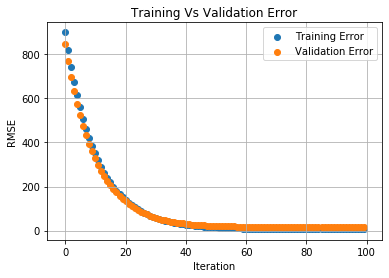

In [18]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

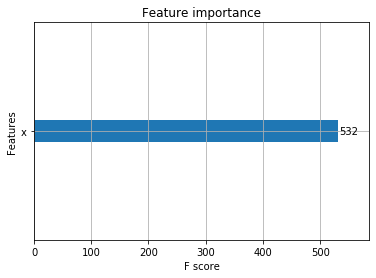

In [19]:
xgb.plot_importance(regressor)

In [20]:
df.head()

,x,y,y_noisy
0,-11.120273,921.068658,921.016598
1,14.829292,805.465821,805.082846
2,-11.731234,1004.927608,999.503858
3,16.744436,1063.758703,1066.740610
4,-0.463552,58.736111,54.262724


In [21]:
X_test = df.iloc[:,:1]
print(X_test[:5])

x
0 -11.120273
1  14.829292
2 -11.731234
3  16.744436
4  -0.463552


In [22]:
# This works
type(X_test)

pandas.core.frame.DataFrame

In [23]:
# This does not work
type(df.iloc[:5,0])

pandas.core.series.Series

In [27]:
result = regressor.predict(X_test)

In [28]:
result[:5]

array([ 914.13556 ,  808.2975  ,  996.34515 , 1073.4296  ,   54.747013],
      dtype=float32)

In [29]:
df['y_predicted'] = result

In [ ]:
df.head()

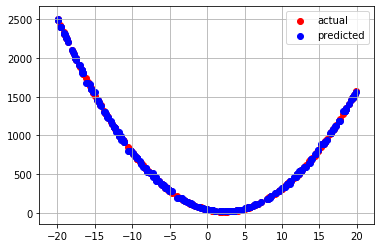

In [30]:
plt.scatter(x=df.x,y=df.y_noisy,color='r',label='actual')
plt.scatter(x=df.x,y=df.y_predicted,color='b',label='predicted')
plt.grid(True)
plt.legend()

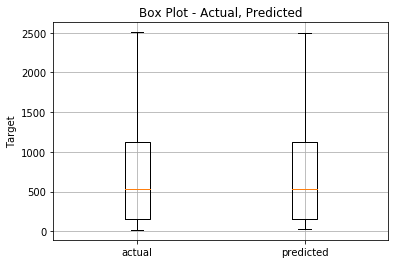

In [31]:
plt.boxplot([df.y_noisy,df.y_predicted], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

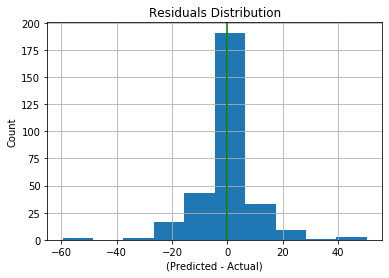

In [32]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df.y_predicted - df.y_noisy)

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


### Tree Based Algorithms cap the upper and lower values that are predicted.

In [34]:
# True Function
def quad_func (x):
    return 5*x**2 -23*x + 47

In [35]:
# X is outside range of training samples
X = np.array([1000,25,-100,5000,-25])
tmp_df = pd.DataFrame({'x':X})

In [36]:
print("True Function:\n{0}".format(quad_func(X)))
print("Predicted:\n{0}".format(regressor.predict(tmp_df)))

True Function:
[  4977047      2597     52347 124885047      3747]
Predicted:
[1566.231  1566.231  2498.9023 1566.231  2498.9023]


In [37]:
# X is inside range of training samples
X = np.array([0,1,3,5,7,9,11,15,18,-15,-12,-5])
tmp_df = pd.DataFrame({'x':X})

In [38]:
print("True Function:\n{0}".format(quad_func(X)))
print("Predicted:\n{0}".format(regressor.predict(tmp_df)))

True Function:
[  47   29   23   57  131  245  399  827 1253 1517 1043  287]
Predicted:
[  47.04674    28.245811   27.066414   63.18764   140.6969    252.8634
  379.79236   808.2975   1319.7086   1561.7623   1039.2347    287.3219  ]


In [39]:
df.describe()

,x,y,y_noisy,y_predicted
count,300.000000,300.000000,300.000000,300.000000
mean,-0.046847,722.293796,722.315189,722.044739
std,11.631511,653.177023,653.352678,652.732971
min,-19.984684,20.643275,16.197206,27.066414
25%,-10.188161,155.673641,153.613849,152.777695
50%,-0.125883,533.697343,535.227828,533.036774
75%,10.719268,1118.990118,1117.454317,1120.614777
max,19.889019,2503.585755,2506.255402,2498.902344


In [40]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df.y_noisy,df.y_predicted)**.5))

RMSE: 10.58826667097993
